In [1]:
conda install tensorflow

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::keras-preprocessing==1.1.2=pyhd3eb1b0_0
  - defaults/osx-64::tensorflow-base==2.9.1=eigen_py310h36d2db2_1
  - defaults/osx-64::keras==2.9.0=py310hecd8cb5_0
  - defaults/osx-64::tensorflow==2.9.1=eigen_py310ha64145f_1
done

## Package Plan ##

  environment location: /Users/vasilisa533/opt/anaconda3/envs/forCNN

  added / updated specs:
    - tensorflow


The following NEW packages will be INSTALLED:

  scipy              pkgs/main/osx-64::scipy-1.7.3-py310h0a4c7d7_2 None


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [2]:
from __future__ import print_function

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
from tensorflow.keras.models import Sequential

In [6]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

In [7]:
from tensorflow.keras.layers import BatchNormalization

In [8]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [9]:
from tensorflow.keras.regularizers import l2

In [10]:
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('fivethirtyeight')
%matplotlib inline

In [11]:
batch_size = 32
num_classes = 10
epochs = 50

In [12]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [13]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [14]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [15]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [16]:
 pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [17]:
import matplotlib.pyplot as plt

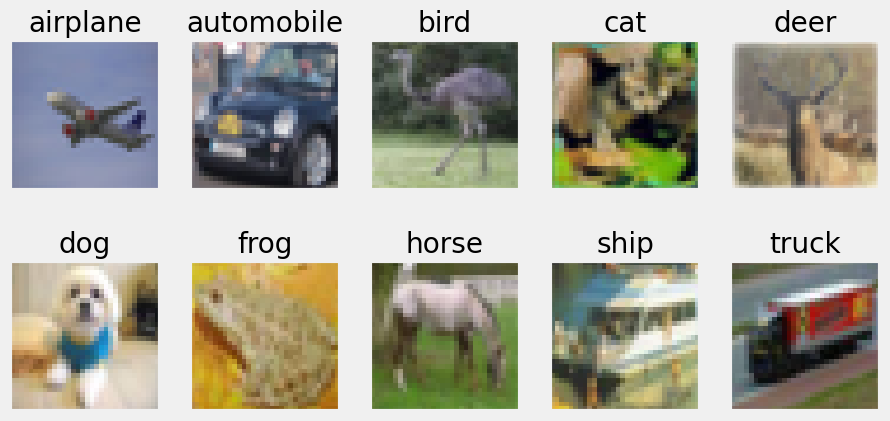

In [18]:
fig = plt.figure(figsize=(10,5))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [19]:
import tensorflow as tf

In [25]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [21]:
valid_size = 10000

In [22]:
y_train.shape

(50000, 1)

In [23]:
y_train[0][0]

6

In [24]:
x_train.shape

(50000, 32, 32, 3)

In [25]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [26]:
x_train[0].shape

(32, 32, 3)

In [27]:
class_names[y_train[0][0]]

'frog'

In [28]:
class_names[y_train[1][0]]

'truck'

In [32]:
numpic, x, y, c = x_train.shape
print(f'Number of images = {numpic}, width = {x}, height = {y}, channels = {c}')

Number of images = 50000, width = 32, height = 32, channels = 3


In [33]:
x_test.shape

(10000, 32, 32, 3)

In [35]:
x_train =x_train / 255.0

In [36]:
x_test =  x_test / 255.0

In [37]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [41]:
from tensorflow.keras.utils import to_categorical

In [45]:
y_cat_train = to_categorical(y_train,10)

In [46]:
y_cat_test = to_categorical(y_test,10)

In [47]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [48]:
x_val = x_train[:valid_size]
y_val_cat = y_cat_train[:valid_size]
x_val.shape

(10000, 32, 32, 3)

In [49]:
y_val_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [50]:
x_train = x_train[valid_size:]
y_cat_train= y_cat_train[valid_size:]

In [51]:
x_train.shape

(40000, 32, 32, 3)

In [52]:
y_cat_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [56]:
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten   

In [66]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_6 (Dense)             (None, 256)              

In [61]:
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
early_stop = EarlyStopping(monitor='val_loss',patience=2) #no need

In [68]:
history = model.fit(x_train,y_cat_train,epochs=25,validation_data=(x_val,y_val_cat))

Epoch 1/25
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5546 - accuracy: 0.4346 - val_loss: 1.3290 - val_accuracy: 0.5254
Epoch 2/25
1250/1250 [==============================] - 10s 8ms/step - loss: 1.2494 - accuracy: 0.5563 - val_loss: 1.1657 - val_accuracy: 0.5871
Epoch 3/25
1250/1250 [==============================] - 10s 8ms/step - loss: 1.0984 - accuracy: 0.6137 - val_loss: 1.1120 - val_accuracy: 0.6097
Epoch 4/25
1250/1250 [==============================] - 10s 8ms/step - loss: 0.9837 - accuracy: 0.6537 - val_loss: 1.0434 - val_accuracy: 0.6330
Epoch 5/25
1250/1250 [==============================] - 10s 8ms/step - loss: 0.8878 - accuracy: 0.6883 - val_loss: 1.0486 - val_accuracy: 0.6354
Epoch 6/25
1250/1250 [==============================] - 10s 8ms/step - loss: 0.8061 - accuracy: 0.7190 - val_loss: 1.0298 - val_accuracy: 0.6536
Epoch 7/25
1250/1250 [==============================] - 10s 8ms/step - loss: 0.7297 - accuracy: 0.7452 - val_loss: 1.0310 - val_ac

In [69]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [71]:
import pandas as pd

In [72]:
metrics = pd.DataFrame(model.history.history)

In [73]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.554636,0.434625,1.329044,0.5254
1,1.249354,0.556300,1.165653,0.5871
2,1.098354,0.613650,1.112007,0.6097
3,0.983682,0.653700,1.043366,0.6330
4,0.887810,0.688250,1.048590,0.6354
5,0.806089,0.718975,1.029815,0.6536
6,0.729736,0.745200,1.030966,0.6573
7,0.662169,0.767550,1.030507,0.6717
8,0.596320,0.790650,1.145719,0.6467
9,0.530532,0.812675,1.132464,0.6544


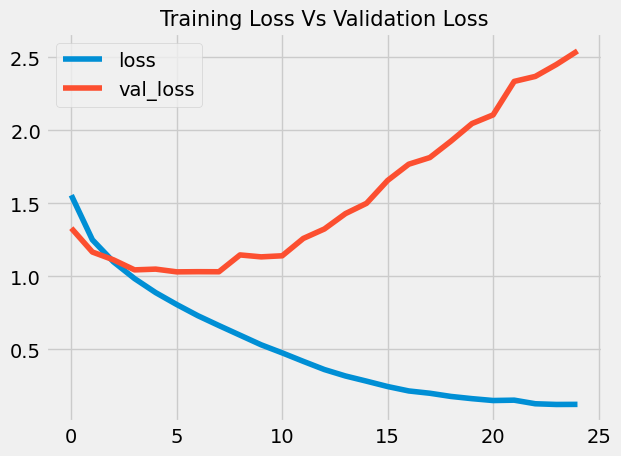

In [78]:
metrics[['loss', 'val_loss']].plot()
plt.title('Training Loss Vs Validation Loss', fontsize=15)
plt.show()

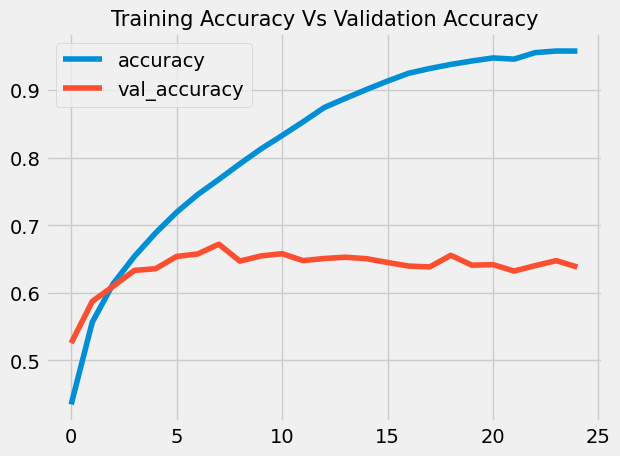

In [79]:
metrics[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy', fontsize=15)
plt.show()

In [76]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.6171 - accuracy: 0.6329


[2.6170876026153564, 0.6328999996185303]

In [80]:
from sklearn.metrics import classification_report, confusion_matrix

In [87]:
from sklearn.metrics import confusion_matrix

In [88]:
predictions = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 1s 3ms/step


In [82]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69      1000
           1       0.81      0.71      0.75      1000
           2       0.62      0.42      0.50      1000
           3       0.41      0.49      0.45      1000
           4       0.63      0.53      0.57      1000
           5       0.48      0.54      0.51      1000
           6       0.68      0.74      0.71      1000
           7       0.62      0.72      0.66      1000
           8       0.75      0.75      0.75      1000
           9       0.67      0.78      0.72      1000

    accuracy                           0.63     10000
   macro avg       0.64      0.63      0.63     10000
weighted avg       0.64      0.63      0.63     10000



In [93]:
confusion_matrix(y_test,predictions)

array([[650,  26,  45,  42,  26,  18,  11,  33,  87,  62],
       [ 29, 707,  11,  19,   6,  11,  21,  22,  39, 135],
       [ 47,  11, 424, 118,  82, 115,  91,  72,  21,  19],
       [ 17,   4,  45, 492,  51, 191,  62,  88,  16,  34],
       [ 15,   5,  50, 105, 525,  78,  82, 105,  20,  15],
       [  7,   7,  43, 198,  43, 537,  39,  89,  13,  24],
       [  7,  10,  32,  84,  40,  60, 739,  10,   9,   9],
       [ 15,   5,  22,  65,  44,  76,  17, 723,   5,  28],
       [ 70,  36,   6,  36,   5,  18,   9,  11, 752,  57],
       [ 26,  63,   8,  28,   7,  17,  10,  22,  39, 780]])

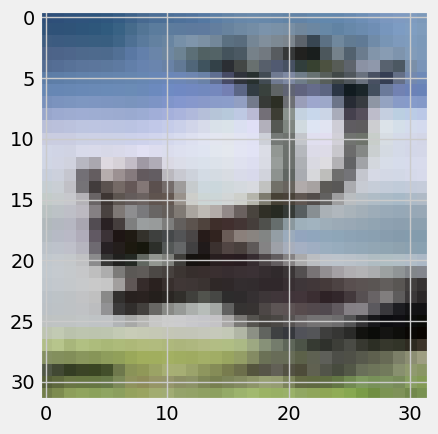

In [109]:
plt.imshow(x_test[40])

In [110]:
test_image = x_test[40]

In [111]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

313/313 [==============================] - 1s 3ms/step


In [112]:
class_names[y_test[40][0]]

'deer'